In [56]:
import numpy as np
import math as m
import astropy
import aplpy
import astropy.units as u
from astropy.utils import data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs.utils import pixel_to_skycoord
from astropy.utils.data import get_pkg_data_filename
import matplotlib.patheffects as PathEffects
import scipy.optimize as opt
from matplotlib.patches import Circle as circ

In [57]:
Ihdu_list = fits.open('l483_iext_mJysqa_8as.fits')
Ihdu = fits.open('l483_iext_mJysqa_8as.fits')[0]
Iwcs = WCS(Ihdu.header)
#Ihdu.header
Iimage_data = Ihdu_list[0].data

IVar = Ihdu_list[1].data


IData = []
IPolData = []
for i in range(0, len(Iimage_data[0])):
    for j in range(0, len(Iimage_data[0][i])):
        IPolData.append([j,i,Iimage_data[0][i][j]])
        IData.append(Iimage_data[0][i][j])
        
IVarData = []
for i in range(0, len(IVar[0])):
    for j in range(0, len(IVar[0][i])):
        IVarData.append([j,i,IVar[0][i][j]])
        

        
        
Qhdu_list = fits.open('l483_qext_mJysqa_8as.fits')
Qhdu = fits.open('l483_qext_mJysqa_8as.fits')[0]
Qwcs = WCS(Qhdu.header)
#Qhdu.header
Qimage_data = Qhdu_list[0].data

QVar = Qhdu_list[1].data

QData = []
QPolData = []
for i in range(0, len(Qimage_data[0])):
    for j in range(0, len(Qimage_data[0][i])):
        #print([i,j,Qimage_data[0][i][j]])
        QPolData.append([j,i,Qimage_data[0][i][j]])
        QData.append(Qimage_data[0][i][j])

QVarData = []
for i  in range(0, len(QVar[0])):
    for j in range(0, len(QVar[0][i])):
        #print([i,j,QVar[0][i][j]])
        QVarData.append([j,i,QVar[0][i][j]])
        
        

        
Uhdu_list = fits.open('l483_uext_mJysqa_8as.fits')
Uhdu = fits.open('l483_uext_mJysqa_8as.fits')[0]
Uwcs = WCS(Uhdu.header)
#Uhdu.header
Uimage_data = Uhdu_list[0].data

UVar = Uhdu_list[1].data


UData = []
UPolData = []
for i in range(0, len(Uimage_data[0])):
    for j in range(0, len(Uimage_data[0][i])):
        UPolData.append([j,i,Uimage_data[0][i][j]])
        UData.append(Uimage_data[0][i][j])
        
UVarData = []
for i in range(0, len(UVar[0])):
    for j in range(0, len(UVar[0][i])):
        UVarData.append([j,i,UVar[0][i][j]])
        
        
        
        
        
PolDataC = []
for i in range(0,len(QPolData)):
    PolDataC.append([QPolData[i][0],QPolData[i][1],IPolData[i][2],QPolData[i][2],UPolData[i][2]])
    
PolVar = []
for i in range(0,len(QVarData)):
    PolVar.append([QVarData[i][0],QVarData[i][1],IVarData[i][2],QVarData[i][2],UVarData[i][2]])
    
sigI=0.02718023855912932

Set OBSGEO-B to    19.822855 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [58]:
outCoords = SkyCoord('18h17m29.93s','-4d39m39.6s',frame='fk5')
coords1 = SkyCoord('18h17m29.93s','-4d40m39.6s',frame='fk5')
pixCoords = skycoord_to_pixel(outCoords,Iwcs)
coords1pix = skycoord_to_pixel(coords1,Iwcs)

print()
print(pixCoords)
print(coords1pix)

print(float(pixCoords[1])-float(coords1pix[0]))

sky = pixel_to_skycoord(40,70,Iwcs)
sky2 = pixel_to_skycoord(40,71,Iwcs)

print(sky)
print(sky2)

print(-4.65388666 - (-4.65166442))
pixRaOut = pixCoords[0]
pixDecOut = pixCoords[1]
lengthOut =  20
angleOut = m.radians(105)


(array(73.97471367), array(66.79983239))
(array(73.97448885), array(59.29990086))
-7.174656461544515
<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (274.45045843, -4.65388666)>
<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (274.45045825, -4.65166442)>
-0.002222240000000042


In [59]:
print(pixRaOut)
print(pixDecOut)

73.9747136670077
66.79983239056233


In [60]:
r = 1.79517*10**17
mLow = 3.978*10**33
mHigh = 1.392*10**34

volume = 4*np.pi*r**3/3
densLow = mLow/volume
densHigh = mHigh/volume

print(densLow, 'to', densHigh, 'g/cm^3')


densNumLow = densLow/(3.3211*10**-24)
densNumHigh = densHigh/(3.3211*10**-24)

print(densNumLow, 'to', densNumHigh, 'parts/cm^3')

1.641570064384251e-19 to 5.744257238870983e-19 g/cm^3
49428.50454320109 to 172962.4895026041 parts/cm^3


In [61]:
Ihdu.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  131 / length of data axis 1                          
NAXIS2  =                  129 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
LBOUND1 =                  -64 / Pixel origin along axis 1                      
LBOUND2 =                  -65 / Pixel origin along axis 2                      
LBOUND3 =                    1 / Pixel origin along axis 3                      
LABEL   = 'I       '        

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -6.699e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.176e+00 [aplpy.core]


<Figure size 720x720 with 0 Axes>

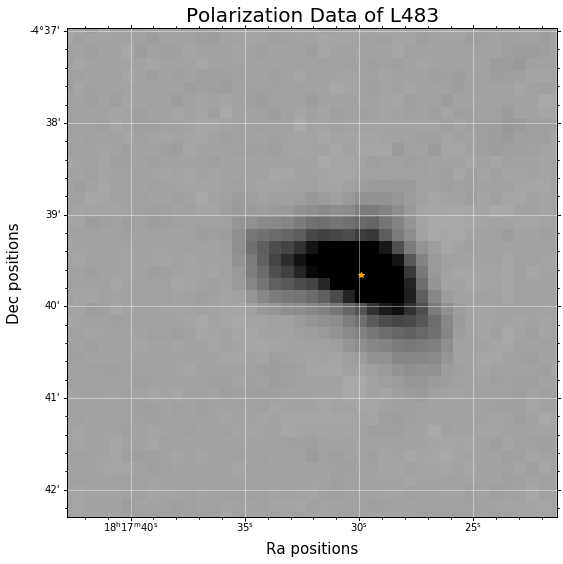

In [62]:
fig = plt.figure(figsize=(10, 10))

image = aplpy.FITSFigure(Ihdu)
image.add_grid()
#image.show_circles(('18h17m29.93s', '-4d39m39.6s', 12000*u.au))
image.show_colorscale(cmap='binary')
#ax = fig.gca()
#circle = plt.Circle((pixRaOut, pixDecOut), 10, color='r')
#ax.add_patch(circle)
plt.title('Polarization Data of L483',fontsize = 20)
plt.xlim([50,90])
plt.ylim([47,87])
plt.xlabel('Ra positions',fontsize = 15)
plt.ylabel('Dec positions',fontsize = 15)
plt.plot(pixRaOut,pixDecOut, marker = '*', color  = 'orange')
plt.show()

In [63]:
total_flux = 0
pixels = 0
for i in range(len(IPolData)):
    distance = np.sqrt((IPolData[i][0]-pixRaOut)**2+(IPolData[i][1]-pixDecOut)**2)
    if distance < 7.17:
        pixels += 1
        total_flux += IPolData[i][2]* 7.99999**2
        
total_flux = total_flux/1000 #in jy

print(total_flux)

total_flux =total_flux*10**(-26)


#area = pixels * 7.99999**2



6.945069439671211


In [64]:
distance = 6.171*10**18
kv = 0.00125

T = 10
h=6.62607004*10**(-34)
c=3*10**8
k=1.38064852*10**(-23)

v = c / 0.00085

a = (2.0*h*v**3)
b = (h*v)/(k*T)
intensity = a/ ((c**2)*(np.exp(b) - 1.0))




solarMass = 1.9889200011446*10**30
mass = (total_flux*(distance**2))/(kv*intensity)

print(mass/solarMass)

7.296778133112809


In [65]:
def masses(radius, temp):
    T = temp
    h=6.62607004*10**(-34)
    c=3*10**8
    k=1.38064852*10**(-23)

    v = c / 0.00085

    a = (2.0*h*v**3)
    b = (h*v)/(k*T)
    intensity = a/ ((c**2)*(np.exp(b) - 1.0))
    
    rad = radius*(1.496*10**11)
    
    #print(rad/distance)
    
    angle = 2*m.degrees(np.arcsin(rad/(2*distance)))
     
    asecSpace = angle * 3600
    pixSpace = asecSpace / 7.9999
    
    
    
    total_flux = 0

    for i in range(len(IPolData)):
        spacing = np.sqrt((IPolData[i][0]-pixRaOut)**2+(IPolData[i][1]-pixDecOut)**2)
        
        if spacing < pixSpace:
            total_flux += IPolData[i][2]* 7.99999**2
    
    total_flux = total_flux/1000
    total_flux = total_flux*10**(-26)
    
    #print(total_flux)
    
    mass = (total_flux*(distance**2))/(kv*intensity)
    
    
    density = mass / ((4*np.pi*rad**3)/3)
    
    numDens = density / (2.8*(3.354*10**(-27)))
    
    numDens = numDens / (1*10**6)
    
    return (mass/solarMass, numDens)

    
    
radiuses = np.linspace(10, 100000, 1000)

massList = []
densList = []
for i in range(len(radiuses)):
    mass = masses(radiuses[i], 10)
    massList.append(mass[0])
    densList.append(mass[1])

massList2 = []
densList2 = []
for i in range(len(radiuses)):
    mass2 = masses(radiuses[i],18)
    massList2.append(mass2[0])
    densList2.append(mass2[1])

In [66]:
def mass(flux, temp):
    T = temp
    h=6.62607004*10**(-34)
    c=3*10**8
    k=1.38064852*10**(-23)

    v = c / 0.00085

    a = (2.0*h*v**3)
    b = (h*v)/(k*T)
    intensity = a/ ((c**2)*(np.exp(b) - 1.0))  
    
    flux = (flux*(10**(-26)))/1000
    
    mass = (flux*(distance**2))/(kv*intensity)

    return mass

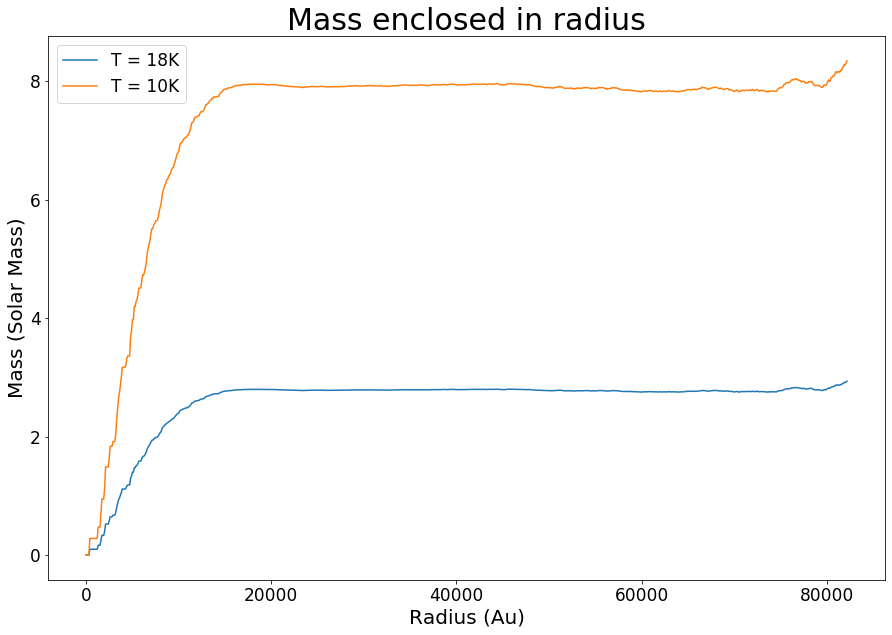

In [67]:
plt.rcParams.update({'font.size':17})
plt.figure(figsize=(15,10))
plt.xlabel('Radius (Au)',fontsize='20')
plt.ylabel('Mass (Solar Mass)',fontsize='20')
plt.title('Mass enclosed in radius',fontsize='30')
plt.plot(radiuses,massList2, label = 'T = 18K')
plt.plot(radiuses,massList, label = 'T = 10K')
plt.legend(loc='upper left')
plt.show()

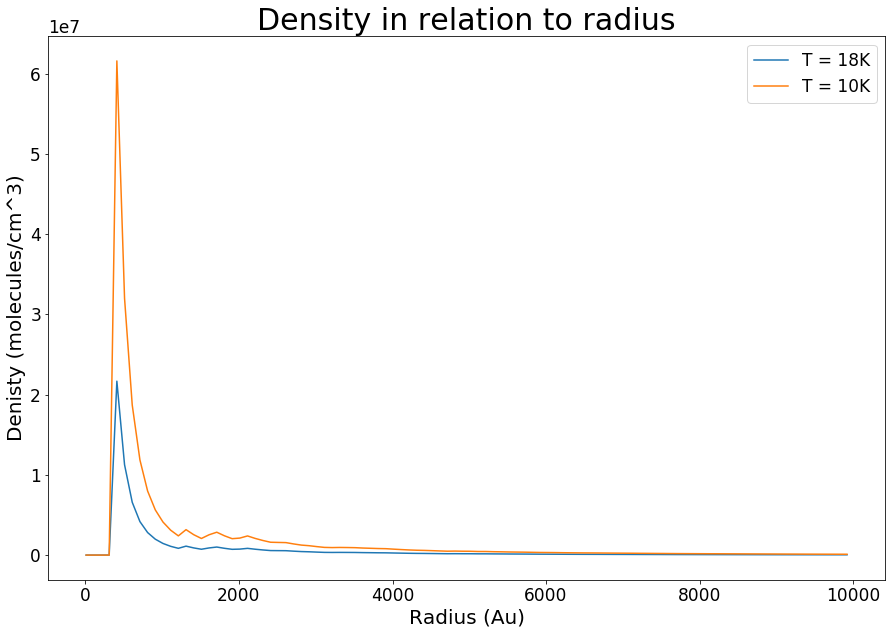

In [68]:
plt.rcParams.update({'font.size':17})
plt.figure(figsize=(15,10))
plt.xlabel('Radius (Au)',fontsize='20')
plt.ylabel('Denisty (molecules/cm^3)',fontsize='20')
plt.title('Density in relation to radius',fontsize='30')
plt.plot(radiuses[:100],densList2[:100], label = 'T = 18K')
plt.plot(radiuses[:100],densList[:100], label = 'T = 10K')
plt.legend(loc='upper right')
plt.show()

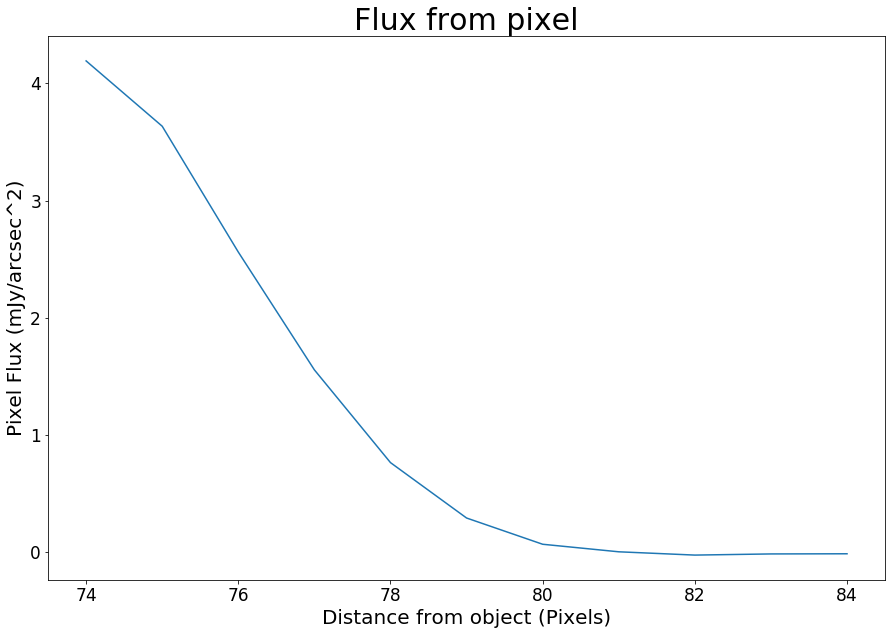

In [69]:
fluxList = np.zeros(11)
for i in range(len(IPolData)):
    if IPolData[i][1] == 67:
        if IPolData[i][0] > 73 and IPolData[i][0] < 85:
            fluxList[IPolData[i][0]-74] = IPolData[i][2]
            
pixLength = np.arange(74,85,1)           
            
            
plt.figure(figsize=(15,10))
plt.xlabel('Distance from object (Pixels)',fontsize='20')
plt.ylabel('Pixel Flux (mJy/arcsec^2)',fontsize='20')
plt.title('Flux from pixel',fontsize='30')
plt.plot(pixLength,fluxList)
plt.show()

In [70]:
print(pixRaOut)
print(pixDecOut)
solarMass = 1.989*10**30
pixLength = 2*distance*(np.tan(m.radians(0.001111)))
print(pixLength)
print(8*pixLength)
print(9*pixLength)

73.9747136670077
66.79983239056233
239318883838341.03
1914551070706728.2
2153869954545069.2


In [71]:
massList10 = []
massList13 = []
massList18 = []

pixDistList = []

totalMass10 = 0
totalMass13 = 0
totalMass18 = 0

massDisk10 = []
massDisk13 = []
massDisk18 = []

densDisk10 = []
densDisk13 = []
densDisk18 = []

densDisk10.clear()
densDisk13.clear()
densDisk18.clear()

massDisk10.clear()
massDisk13.clear()
massDisk18.clear()



for j in range(0,13):
    
    pixels = 0
    pixDistList.append(j)
    
    diskMass10 = 0
    diskMass13 = 0
    diskMass18 = 0
    
    for i in range(len(IPolData)):
        
        if IPolData[i][2] != 0:
            
            spacing = np.sqrt((IPolData[i][0]-74)**2+(IPolData[i][1]-67)**2)
            
            if spacing <= j:
                
                pixels += 1
                
                #fluxAv += IPolData[i][2]
                flux = IPolData[i][2]* 7.99999**2
            
                plusMass10 = mass(flux,10)
                plusMass13 = mass(flux,13)
                plusMass18 = mass(flux,18)
                
                diskMass10 += plusMass10
                diskMass13 += plusMass13
                diskMass18 += plusMass18
                
                IPolData[i][2] = 0
            
                totalMass10 += plusMass10
                totalMass13 += plusMass13
                totalMass18 += plusMass18
    print(pixels)
    depth = 2*np.sqrt((7*pixLength)**2-(j*pixLength)**2)
    print(depth)
    volume = depth * pixLength**2
    
    
    
    
    massAv10 = diskMass10/pixels
    massAv13 = diskMass13/pixels
    massAv18 = diskMass18/pixels
    #print("mass/pix", massAv10)
    #print("VOlume", volume)
    
    #print('massAv10kg', massAv10kg)
    
    density10 = massAv10/volume
    density13 = massAv13/volume
    density18 = massAv18/volume
    
    #print('massDens', density10)
    numDens10 = density10 / ((2.8*(1.67*10**(-27)))* (1*10**6))
    numDens13 = density13 / ((2.8*(1.67*10**(-27)))* (1*10**6))
    numDens18 = density18 / ((2.8*(1.67*10**(-27)))* (1*10**6))
  
    massDisk10.append(massAv10)
    massDisk13.append(massAv13)
    massDisk18.append(massAv18)
    
    densDisk10.append(numDens10)
    densDisk13.append(numDens13)
    densDisk18.append(numDens18)
    
    massList10.append(totalMass10)
    massList13.append(totalMass13)
    massList18.append(totalMass18)
                
                

1
3350464373736774.5
4
3316099728149447.5
8
3210799755371438.0
16
3027171040073669.0
20
2749564641417815.0
32
2344836604865341.0
32
1725753013731897.2
36
0.0
48
nan
56
nan
64
nan
60
nan


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


64
nan


In [72]:
for i in range(len(pixDistList)):
    pixDistList[i] = pixDistList[i]*pixLength/(1.496*10**11)
    
for i in range(len(massList10)):
    massList10[i] = massList10[i]/solarMass
    massList13[i] = massList13[i]/solarMass
    massList18[i] = massList18[i]/solarMass
    massDisk10[i] = massDisk10[i]/solarMass
    massDisk13[i] = massDisk13[i]/solarMass
    massDisk18[i] = massDisk18[i]/solarMass

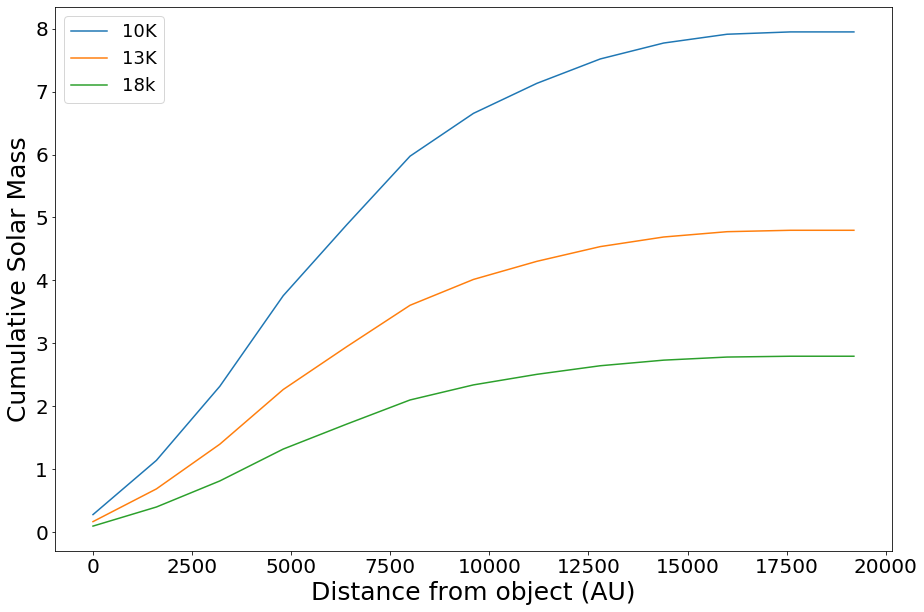

In [73]:
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(15,10))
plt.xlabel('Distance from object (AU)',fontsize='25')
plt.ylabel('Cumulative Solar Mass',fontsize='25')
#plt.title('Cumulative Mass',fontsize='30')
plt.plot(pixDistList,massList10, label = '10K')
plt.plot(pixDistList,massList13, label = '13K')
plt.plot(pixDistList,massList18, label = '18k')
plt.legend(loc='upper left', fontsize ='18')
plt.savefig('cumulative_mass.png')
plt.show()

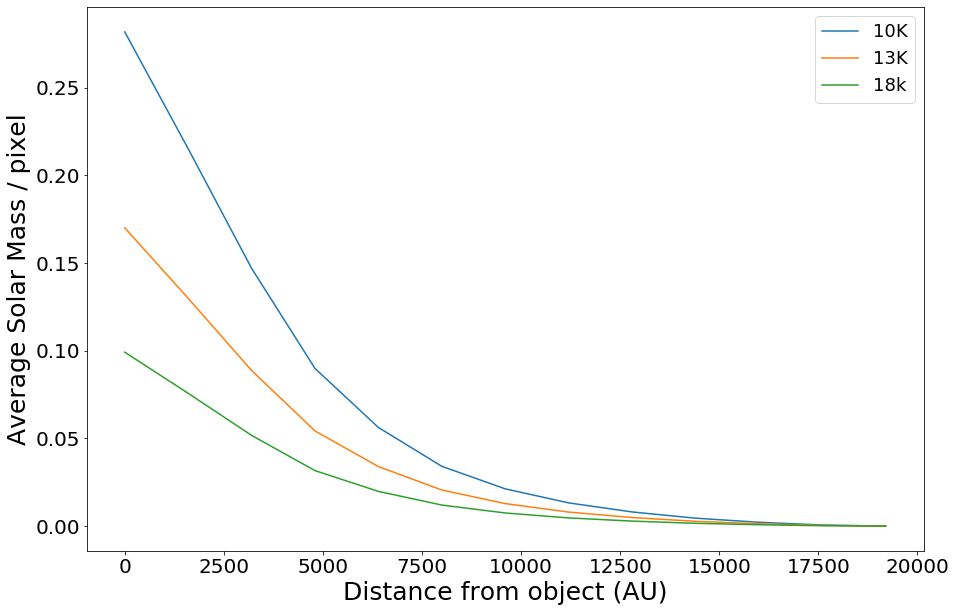

In [74]:
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(15,10))
plt.xlabel('Distance from object (AU)',fontsize='25')
plt.ylabel('Average Solar Mass / pixel',fontsize='25')
#plt.title('Mass profile',fontsize='30')
plt.plot(pixDistList,massDisk10, label = '10K')
plt.plot(pixDistList,massDisk13, label = '13K')
plt.plot(pixDistList,massDisk18, label = '18k')
plt.legend(loc='upper right',fontsize = '18')
plt.savefig('average_mass.png')
plt.show()

In [75]:
def powLaw(x_val):
    nf = 6*10**5
    rf = 1000
    p = 2
    dens = nf*(x_val/rf)**(-1.2)
    return dens


rads = np.linspace(700,12000,500)


densShirley = []

for i in range(len(rads)):
    densShirley.append(powLaw(rads[i]))

    


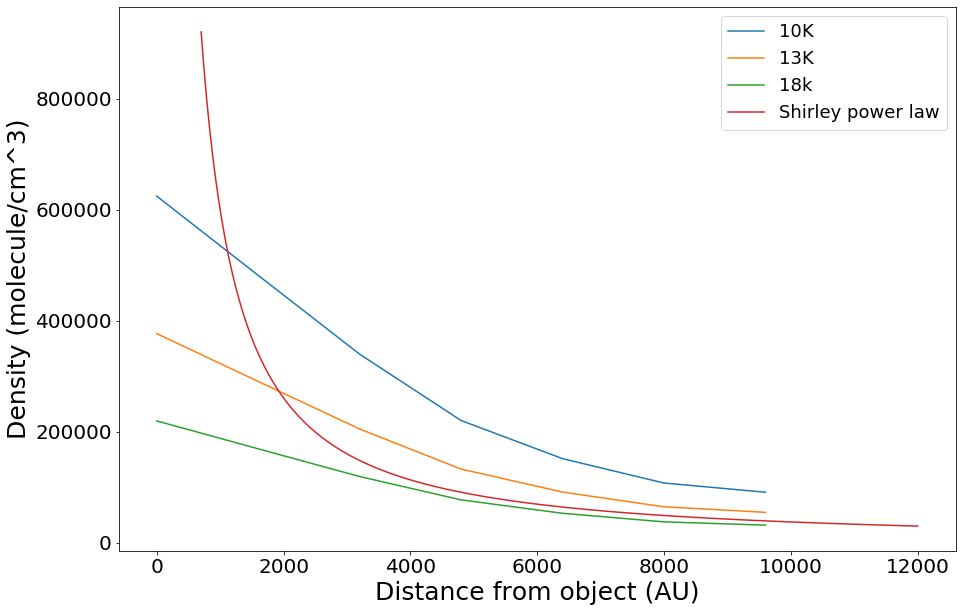

In [76]:
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(15,10))

plt.xlabel('Distance from object (AU)',fontsize='25')
plt.ylabel('Density (molecule/cm^3)',fontsize='25')

plt.plot(pixDistList,densDisk10, label = '10K')
plt.plot(pixDistList,densDisk13, label = '13K')
plt.plot(pixDistList,densDisk18, label = '18k')
plt.plot(rads,densShirley, label = 'Shirley power law')

plt.legend(loc='upper right', fontsize = '18')
plt.savefig('density_profile.png')
plt.show()

In [77]:
print(densDisk13)

[377077.65610348823, 290951.3063141357, 205294.42797697464, 133154.9116885472, 91708.6850230882, 65182.408104195885, 55191.73709023065, inf, nan, nan, nan, nan, nan]


In [78]:
velo_disp = 0.4 #km/s
ang_disp = 11.4 #deg
#density = 1*10**5 #/cm^3
rad = 1.945*10**15 #m
radcm = 1.945*10**17
M = 9.540784193491058*10**30 #kg
M18 = 5.56*10**30
M10 = 1.58*10**31
mH = 1.67*10**(-27) #g

volume = (4*np.pi*radcm**3)/3

num_dens = 9.541*10**30 / (volume * 2.8 * mH)
num_dens18 = M18 / (volume * 2.8 * mH)
num_dens10 = M10 / (volume * 2.8 * mH)


print(num_dens)
print(num_dens10)
print(num_dens18)
def dcf(ang, velo, dens):
    b = 9.3*np.sqrt(dens)*velo/ang
    return b

def gravE(mass, radius):
    G = 6.674*10**(-11)
    return (-1*(3*G*(mass**2)/(radius*5)))
                   
def magE(B_strength, radius):
    volume = (4*np.pi*radius**3)/3
    print(volume)
    return (((B_strength**2)*volume)/(2*((4*np.pi)*10**(-7))))

def kinTE(mass, temp):
    kb = 1.39*10**(-23)
    umh= (2.8*mH)
    return 1.5*mass*kb*temp/umh

def kinNTE(mass, nt_sigma):
    return 0.5*mass*(nt_sigma*1000)**2
    
    
    
mag =  dcf(ang_disp, velo_disp, 7.6*10**4)
magTesla = (mag*10**(-6))/10000


print("The magnetic field strength is:",mag,'microgauss')
print("Gravitational potential energy is:",gravE(M,rad),"J")
print("Magnetic field energy is:",magE(magTesla, rad),"J")
print("Kinetic energy is:",kinTE(M,13),"J")
print(kinNTE(M,0.4))

66202.13066054347
109631.44999859415
38579.16848051794
The magnetic field strength is: 89.95905501364145 microgauss
Gravitational potential energy is: -1.8740707916935375e+36 J
3.082104973537866e+46
Magnetic field energy is: 9.924241773508771e+35 J
Kinetic energy is: 5.5304310428694415e+35 J
7.632627354792846e+35


In [79]:
print(8.7*(1.989*10**30))

1.73043e+31
